In [1]:
%run oanda_initial.py
import matplotlib.pyplot as plt
from scipy import integrate
N =150 # data number
dt =5 # data step [s]
t = np.arange(0, N*dt, dt) # time
close=get_mdata(N,ex_pair)['close']

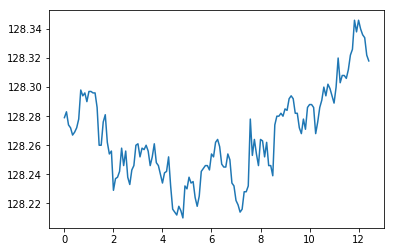

In [4]:
plt.plot(t/60,close)

In [3]:
class CycleAnalysis():
    def __init__(self,PeriodMinutes):
        self.PeriodMinutes=PeriodMinutes # Units:Minutes
        self.PeriodSeconds=PeriodMinutes*60 # Units:Seconds
        self.DataQuantity=int(self.PeriodSeconds/dt)
    def ChartData(self,ShiftQuantity,ShiftNum):
        self.ShiftQuantity=ShiftQuantity # シフト量（一回でどれだけシフトするか）
        self.ShiftNum=ShiftNum # シフト番号（何回目のシフトか(0回目から始まる)）
        self.HeadDataNum=ShiftQuantity*ShiftNum
        self.EndDataNum=self.HeadDataNum+self.DataQuantity
        self.HeadTime=self.HeadDataNum*dt/60 # Units:minutes
        self.EndTime=self.HeadTime+self.PeriodMinutes # Units:minutes
        if self.EndDataNum<=len(close):
            self.t=t[self.HeadDataNum:self.EndDataNum]
            self.Data=close[self.HeadDataNum:self.EndDataNum]
            self.fixa=((np.dot(self.t,self.Data)- self.Data.sum() * self.t.sum()/self.DataQuantity)/((self.t** 2).sum() - self.t.sum()**2 / self.DataQuantity))
            self.fixb=(self.Data.sum() - self.fixa *self.t.sum())/self.DataQuantity
            self.RegressionLine=self.fixa*self.t+self.fixb
            self.FixData=self.Data-self.RegressionLine
            self.a0=1/self.PeriodSeconds*integrate.simps(self.FixData,self.t)
            self.a1=2/self.PeriodSeconds*integrate.simps(self.FixData*np.cos(2*np.pi*self.t/self.PeriodSeconds),self.t)
            self.b1=2/self.PeriodSeconds*integrate.simps(self.FixData*np.sin(2*np.pi*self.t/self.PeriodSeconds),self.t)
            self.A1=np.sqrt(self.a1**2+self.b1**2)
            self.Theta1=np.arctan2(self.a1,self.b1)
            self.A1Sin=self.A1*np.sin(2*np.pi*self.t/self.PeriodSeconds+self.Theta1)
        else: return False
        return True

In [4]:
ca=CycleAnalysis(5)

In [5]:
i=0
A1Sinlist=[]
tlist=[]
RegressionLineList=[]
while ca.ChartData(5,i):
    A1Sinlist.append(ca.A1Sin)
    tlist.append(ca.t)
    RegressionLineList.append(ca.RegressionLine)
    i+=1
A1Sinlist

[array([-0.00539265, -0.00447053, -0.00311081, -0.00144657,  0.00035926,
         0.00212993,  0.00369211,  0.00489287,  0.00561469,  0.0057869 ,
         0.00539265,  0.00447053,  0.00311081,  0.00144657, -0.00035926,
        -0.00212993, -0.00369211, -0.00489287, -0.00561469, -0.0057869 ]),
 array([-0.0007393 ,  0.00069481,  0.0020609 ,  0.00322526,  0.00407391,
         0.00452377,  0.00453082,  0.00409436,  0.00325711,  0.00210104,
         0.0007393 , -0.00069481, -0.0020609 , -0.00322526, -0.00407391,
        -0.00452377, -0.00453082, -0.00409436, -0.00325711, -0.00210104]),
 array([ 0.00986729,  0.00897322,  0.00720079,  0.00472349,  0.00178383,
        -0.00133044, -0.00431449, -0.0068762 , -0.00876482, -0.00979548,
        -0.00986729, -0.00897322, -0.00720079, -0.00472349, -0.00178383,
         0.00133044,  0.00431449,  0.0068762 ,  0.00876482,  0.00979548]),
 array([-0.00171544, -0.00291058, -0.00382082, -0.00435704, -0.00446677,
        -0.00413926, -0.00340657, -0.00234042

In [10]:
ca.ChartData(130,1)

True

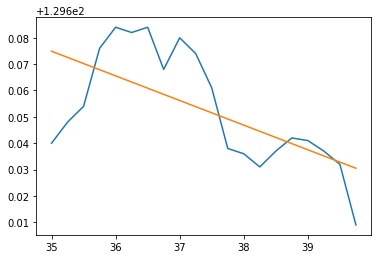

In [15]:
plt.plot(ca.t/60,ca.Data,ca.t/60,ca.RegressionLine)

In [7]:
ca.EndDataNum

160

In [44]:
ca.A1

0.01774171515547275

In [ ]:
def fourier(PeriodMinutes)

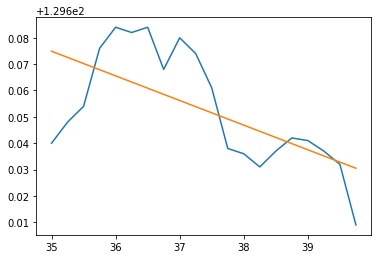

In [6]:
plt.plot(ca.t/60,ca.Data,ca.t/60,ca.RegressionLine)

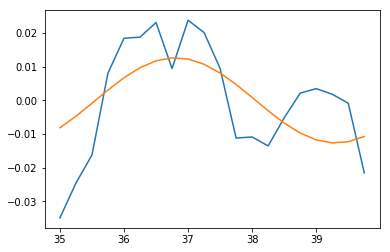

In [8]:
plt.plot(ca.t/60,ca.FixData,ca.t/60,ca.A1Sin)

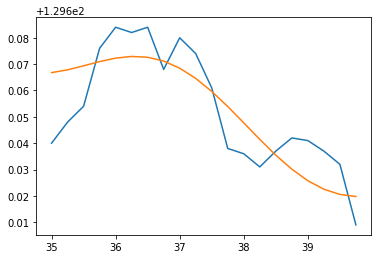

In [9]:
plt.plot(ca.t/60,ca.Data,ca.t/60,ca.A1Sin+ca.RegressionLine)

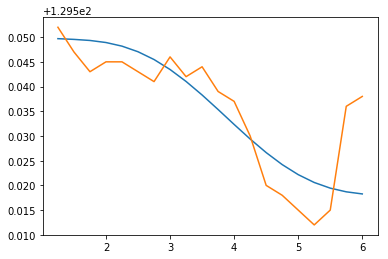

In [10]:
plt.plot(tlist[1]/60,A1Sinlist[1]+RegressionLineList[1],tlist[1]/60,close[5:25])

In [12]:
tlist[1]

array([ 75,  90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255,
       270, 285, 300, 315, 330, 345, 360])

In [25]:
len(tlist[0])

20

In [84]:
tl=[]
for i in range(25,29):
    tl.append(tlist[i]/60)
tl

[array([31.25, 31.5 , 31.75, 32.  , 32.25, 32.5 , 32.75, 33.  , 33.25,
        33.5 , 33.75, 34.  , 34.25, 34.5 , 34.75, 35.  , 35.25, 35.5 ,
        35.75, 36.  ]),
 array([32.5 , 32.75, 33.  , 33.25, 33.5 , 33.75, 34.  , 34.25, 34.5 ,
        34.75, 35.  , 35.25, 35.5 , 35.75, 36.  , 36.25, 36.5 , 36.75,
        37.  , 37.25]),
 array([33.75, 34.  , 34.25, 34.5 , 34.75, 35.  , 35.25, 35.5 , 35.75,
        36.  , 36.25, 36.5 , 36.75, 37.  , 37.25, 37.5 , 37.75, 38.  ,
        38.25, 38.5 ]),
 array([35.  , 35.25, 35.5 , 35.75, 36.  , 36.25, 36.5 , 36.75, 37.  ,
        37.25, 37.5 , 37.75, 38.  , 38.25, 38.5 , 38.75, 39.  , 39.25,
        39.5 , 39.75])]

In [85]:
al=[]
for i in range(25,29):
    al.append(A1Sinlist[i]+RegressionLineList[i])
al

[array([129.70373669, 129.70153971, 129.69738728, 129.69146692,
        129.68413919, 129.67590243, 129.66734395, 129.65908256,
        129.65170798, 129.64572313, 129.64149488, 129.63921819,
        129.63889693, 129.64034361, 129.64319765, 129.64696073,
        129.65104552, 129.65483323, 129.65773413, 129.65924529]),
 array([129.65973059, 129.65718779, 129.65363876, 129.64957014,
        129.64551947, 129.64202249, 129.63956076, 129.63851451,
        129.6391254 , 129.64147287, 129.6454664 , 129.65085432,
        129.65724846, 129.66416219, 129.67105797, 129.67740007,
        129.68270691, 129.68659827, 129.6888325 , 129.68933014]),
 array([129.62493869, 129.62609486, 129.62943499, 129.63469426,
        129.64141997, 129.64901587, 129.65680055, 129.6640741 ,
        129.67018665, 129.67460199, 129.67695003, 129.67706304,
        129.67499208, 129.67100198, 129.66554545, 129.65921872,
        129.65270321, 129.64669884, 129.64185545, 129.63870929]),
 array([129.6667801 , 129.66783941

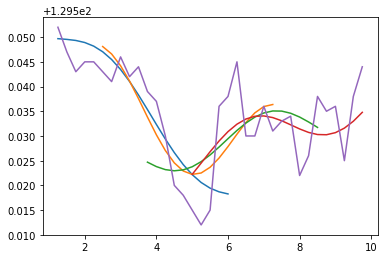

In [68]:
plt.plot(tl[1],al[1],tl[2],al[2],tl[3],al[3],tl[4],al[4],t[5:40]/60,close[5:40])

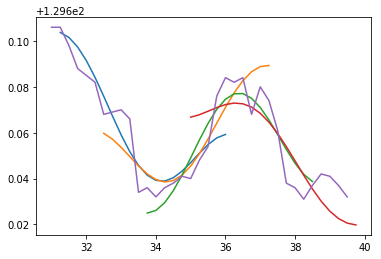

In [90]:
plt.plot(tl[0],al[0],tl[1],al[1],tl[2],al[2],tl[3],al[3],t[124:159]/60,close[124:159])

In [ ]:
ca=CycleAnalysis(5)

In [76]:
ca2=CycleAnalysis(6)

In [69]:
i=0
A1list=[]
while ca.ChartData(5,i):
    A1list.append(ca.A1)
    i+=1
A1list

[0.005798044732906488,
 0.004583786892863783,
 0.009956576960146865,
 0.0044806475334925305,
 0.0050492503787797965,
 0.003895031121725646,
 0.004269704882854716,
 0.0036601953453134026,
 0.003886824146226546,
 0.007702455739760561,
 0.0020891335790641135,
 0.007431111918043718,
 0.008730771135761083,
 0.0074038366640370714,
 0.007896710986979066,
 0.0006921988400790132,
 0.001173355604558949,
 0.0032992831834194117,
 0.005786351570040495,
 0.014702836935470242,
 0.0045472524929927385,
 0.010001228631495702,
 0.003958331097634851,
 0.012066430044493166,
 0.009926076334140494,
 0.020205786020339442,
 0.01774171515547275,
 0.02291403258752159,
 0.012653148954310038]

In [111]:
def A1ave(ca):
    i=0
    A1list=[]
    while ca.ChartData(1,i):
        A1list.append(ca.A1)
        i+=1
    return np.mean(A1list)

In [71]:
len(A1list)

29

In [72]:
np.mean(A1list)

0.007810417567928423

In [77]:
A1ave(ca2)

0.00981136066875539

In [81]:
A1ave(CycleAnalysis(1))

0.0029446907454703784

In [92]:
A1AveList=[]
for i in range(1,10):
    tl.append(tlist[i]/60)
tl

[array([31.25, 31.5 , 31.75, 32.  , 32.25, 32.5 , 32.75, 33.  , 33.25,
        33.5 , 33.75, 34.  , 34.25, 34.5 , 34.75, 35.  , 35.25, 35.5 ,
        35.75, 36.  ]),
 array([32.5 , 32.75, 33.  , 33.25, 33.5 , 33.75, 34.  , 34.25, 34.5 ,
        34.75, 35.  , 35.25, 35.5 , 35.75, 36.  , 36.25, 36.5 , 36.75,
        37.  , 37.25]),
 array([33.75, 34.  , 34.25, 34.5 , 34.75, 35.  , 35.25, 35.5 , 35.75,
        36.  , 36.25, 36.5 , 36.75, 37.  , 37.25, 37.5 , 37.75, 38.  ,
        38.25, 38.5 ]),
 array([35.  , 35.25, 35.5 , 35.75, 36.  , 36.25, 36.5 , 36.75, 37.  ,
        37.25, 37.5 , 37.75, 38.  , 38.25, 38.5 , 38.75, 39.  , 39.25,
        39.5 , 39.75]),
 array([1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75,
        4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ,
        5.25, 5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25]),
 array([3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75

In [112]:
A1AveList=[]
for i in np.arange(0.5,10.5,0.5):
    A1AveList.append(A1ave(CycleAnalysis(i)))
A1AveList

[2.1861478385776163e-12,
 0.003115865443505681,
 0.0038737681731744775,
 0.0045858467373360795,
 0.0048977900314161275,
 0.005132399514298687,
 0.005709462921598706,
 0.0064435191691772685,
 0.007125815835934793,
 0.007847512213166737,
 0.00859943647762787,
 0.009717778456879407,
 0.010412409279650632,
 0.011608712939749941,
 0.01274619196636374,
 0.013216850520034107,
 0.013665431799639785,
 0.014239329580038101,
 0.014963191858666668,
 0.015864304791366905]

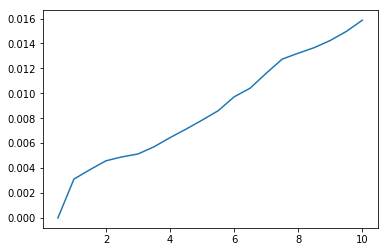

In [113]:
plt.plot(np.arange(0.5,10.5,0.5),A1AveList)

In [114]:
print(np.arange(0.5,10.5,0.5))

[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10. ]


In [115]:
A1AveList/np.arange(0.5,10.5,0.5)

array([4.37229568e-12, 3.11586544e-03, 2.58251212e-03, 2.29292337e-03,
       1.95911601e-03, 1.71079984e-03, 1.63127512e-03, 1.61087979e-03,
       1.58351463e-03, 1.56950244e-03, 1.56353391e-03, 1.61962974e-03,
       1.60190912e-03, 1.65838756e-03, 1.69949226e-03, 1.65210632e-03,
       1.60769786e-03, 1.58214773e-03, 1.57507283e-03, 1.58643048e-03])

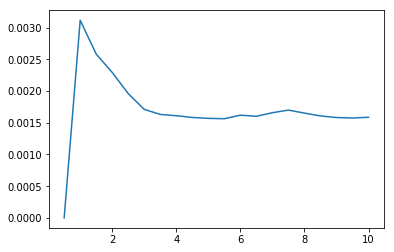

In [116]:
plt.plot(np.arange(0.5,10.5,0.5),A1AveList/np.arange(0.5,10.5,0.5))